<a href="https://colab.research.google.com/github/seasighter/TF-ANN-Classification/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MNIST Digit classificationn
# ANN model pratice


In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
import numpy as np

In [ ]:
# to downlaod the MNIST dataset
mnist=tf.keras.datasets.mnist

Each images in MNIST dataset is of 28*28 =784 pixels it is not in 3
dimension becuz it doesnot contain any color **italicised text**
The dataset is already converted into train -test form




In [ ]:
(x_train,y_train),(X_test,Y_test)=mnist.load_data()

In [ ]:
 x_train.shape # It is in shape N*28*28

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
# Building the model
model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # to convert the multidimensional array to single dimension
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation="softmax")

])

In [ ]:
r=model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
r=model.fit(x_train,y_train,validation_data=(X_test,Y_test),epochs=18)

Epoch 1/18
1875/1875 [==============================] - 9s 5ms/step - loss: 2.6739 - accuracy: 0.7709 - val_loss: 0.4825 - val_accuracy: 0.8815
Epoch 2/18
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5546 - accuracy: 0.8576 - val_loss: 0.3529 - val_accuracy: 0.9194
Epoch 3/18
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4642 - accuracy: 0.8771 - val_loss: 0.3003 - val_accuracy: 0.9273
Epoch 4/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4148 - accuracy: 0.8918 - val_loss: 0.2753 - val_accuracy: 0.9362
Epoch 5/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3983 - accuracy: 0.8963 - val_loss: 0.2922 - val_accuracy: 0.9355
Epoch 6/18
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3793 - accuracy: 0.9016 - val_loss: 0.2869 - val_accuracy: 0.9369
Epoch 7/18
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3587 - accuracy: 0.9083 - val_loss: 0.2739 - val_accuracy:

In [ ]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(Y_test,np.argmax(Y_pred,axis=1))
print(confusion)

[[ 937    0    1    1    0    0    8    1   31    1]
 [   0 1109    4    1    0    2    1    0   18    0]
 [   2    0  992    2    2    1    2    4   25    2]
 [   0    0    8  961    0    5    0    8   24    4]
 [   1    0    3    0  903    0    9    3   16   47]
 [   2    0    2   35    1  805   10    2   30    5]
 [   3    3    0    0    3    7  933    0    9    0]
 [   0    3   18    8    7    1    0  972    5   14]
 [   3    0    5    1    5    6    9    2  936    7]
 [   1    4    0   14   17    7    0    5   26  935]]


<ipython-input-114-e16757384942>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclasssified_idx=np.where(Y_pred !=Y_test)[0]


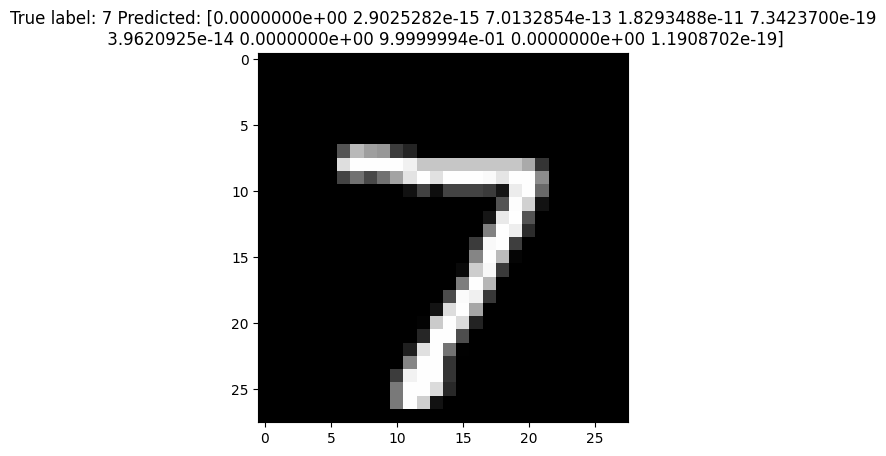

In [ ]:
misclasssified_idx=np.where(Y_pred !=Y_test)[0]
i=np.random.choice(misclasssified_idx)
plt.imshow(X_test[i],cmap='gray');
plt.title("True label: %s Predicted: %s" % (Y_test[i],Y_pred[i]));

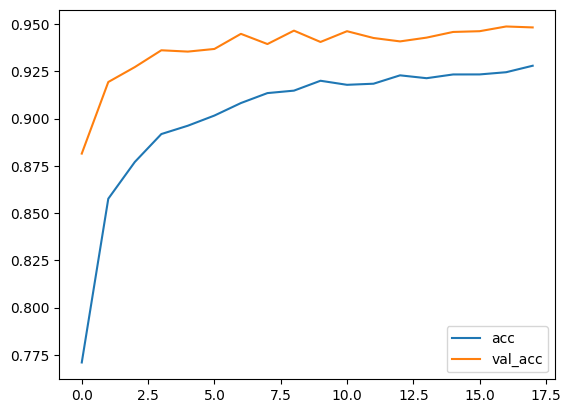

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend();    # val_acc = validation accuracy
                 # acc = test accuracy


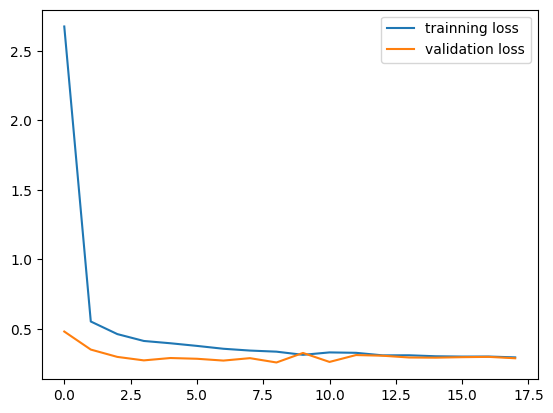

In [ ]:
plt.plot(r.history["loss"],label="trainning loss")
plt.plot(r.history["val_loss"],label="validation loss")
plt.legend();

In [ ]:
# Evaluate the model
print(model.evaluate(X_test,Y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.2905 - accuracy: 0.9483
[0.29049551486968994, 0.9483000040054321]
